In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cw = pd.read_csv("results/128_class_codewords.csv")
codewords = cw.values[:, 1:]
adv_pc = pd.read_csv("results/128_adv_predicted_codeword.csv", index_col=False)
adv_labels = pd.read_csv("results/128_adv_hamming_distances.csv")
true_pc = pd.read_csv("results/128_predicted_codeword.csv", index_col=False)
true_labels = pd.read_csv("results/128_hamming_distances.csv")

In [3]:
def get_accuracies(hamming_ratio, codeword_length, labels):
    num_correct_pred = 0
    num_abstain = 0
    num_incorrect_pred = 0
    for i in range(9850):
        #x = pc.loc[i].values[1:]
        #dx = np.sum(np.abs(codewords - x), 1)
        dx = labels.loc[i].values[1:11]
        idy = labels.loc[i].values[11:]
        i = np.argmin(dx)
        if dx[i] <  codeword_length * hamming_ratio:
            if idy[i] == 1:
                num_correct_pred += 1
            else:
                num_incorrect_pred += 1
        else:
            num_abstain += 1
    return num_correct_pred, num_abstain, num_incorrect_pred

In [5]:
accuracy = []
adv_accuracy = []
ratios = np.arange(0.01, 0.5, 0.01)
for hr in ratios:
    x1, y1, z1 = get_accuracies(hr, 128, true_labels)
    x2, y2, z2 = get_accuracies(hr, 128, adv_labels)
    accuracy.append( x1 / (x1 + y1 + z1) )
    adv_accuracy.append( (x2 + y2) / (x2 + y2 + z2) )

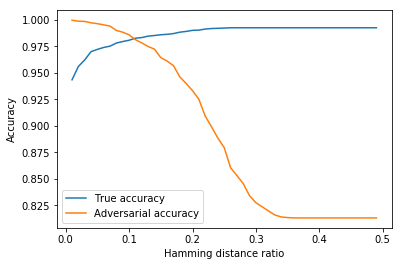

In [9]:
plt.plot(ratios, accuracy)
plt.plot(ratios, adv_accuracy)
plt.xlabel('Hamming distance ratio')
plt.ylabel('Accuracy')
plt.legend(['True accuracy', 'Adversarial accuracy'])
plt.savefig('figures/128_hamming_ratio.')